# Monte Carlo Simulation, Central Limit Theorem and Hypothesis Tesing

### purpose of this assignment
- Implement Monte Carlo simulation.
- Observe and understand the Central Limit Theorem in action.
- Understanding how hypothesis testing can help in analyzing data and making decisions based on it in different situations.

In [1]:
from  piCalculation import *
from menschGame import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform

## 1. Monte Carlo Simulation

### 1.1 Pi Calculation
This following code is an implementation of the Monte Carlo method to estimate the value of `pi`. The code generates a specified number of random points within a square, and then checks if each point is within a circle with a radius equal to the half of the square's side. The ratio of points inside the circle is then multiplied by 4 to get an estimate of the value of `pi`. The main function generates random points, estimates `pi`, and prints the result.


In [2]:
num_points = 100000
square_side = 2
points = generate_points(num_points, square_side)
pi_estimate = estimate_pi(points, square_side)
print(f"Estimated value of Pi: {pi_estimate}")
print(f"Accuracy: {round(100 - abs(math.pi - pi_estimate) / math.pi * 100, 2)}%")

Estimated value of Pi: 3.12892
Accuracy: 99.6%


### 1.2 Mensch Game
I defines three classes: `Peg`, `Mensch` and `Mensch_Simulation`.

#### Mensch Class:

The `Mensch` class seems to be a representation of a game (possibly a simplified version of a board game similar to Ludo). Here's a breakdown of its main components:

- **Attributes**:
  - `_num_player`: Number of players in the game.
  - `_players`: A list of player objects initialized with positions based on the number of boxes.
  - `_current_player` and `_previous_player`: Keeps track of the current and previous player.
  - `_winner`: Holds the label of the winning player.
  - `_last_box`: Position of the last box on the board.
  - `_next_player`: A generator function to determine the next player's turn.

- **Methods**:
  - `_roll_dice()`: Simulates rolling a dice and returns a number between 1 and 6.
  - `_next_turn()`: A generator function that cycles through players to determine whose turn it is.
  - `print_result(dice)`: Prints the current player, all players, and the dice roll.
  - `_check_boxes()`: Checks for collisions between players and handles player movement and restarts.
  - `run()`: Main game loop that iterates until a winner is determined.

#### Mensch_Simulation Class:

The `Mensch_Simulation` class is designed to simulate multiple games of `Mensch` and collect statistics on the winners:

- **Attributes**:
  - `num_game`: Number of games to simulate.

- **Methods**:
  - `run()`: Initializes a single `Mensch` game and returns the winner.
  - `simulate()`: Runs multiple games and returns a `Counter` object that counts the number of times each player wins.



In [3]:
test = Mensch_Simulation(100000)
test.simulate()

Counter({'Player 4': 26551,
         'Player 3': 25025,
         'Player 1': 24331,
         'Player 2': 24093})

## 2. Central Limit Theorem(CLT)

The provided code demonstrates the Central Limit Theorem (CLT) through simulation. Here's a brief summary of what the code does:

1. **Initialization**:
    - `num_samples`: Number of sample means to generate for each sample size.
    - `sample_sizes`: List of sample sizes to analyze.
    - `distributions`: List of distributions to analyze (normal, exponential, and uniform).
    - `xlim_ranges`: List of x-axis limits for each distribution.

2. **Functions**:
    - `generate_sample_means(distribution, sample_size)`: Generates `num_samples` sample means from a given distribution and sample size.
    - `plot_sample_means(sample_means, sample_size, distribution, xlim_range)`: Plots the histogram of sample means and the expected normal distribution curve.

3. **Simulation**:
    - For each distribution (`norm`, `expon`, `uniform`):
        - For each sample size in `sample_sizes`:
            - Generate `num_samples` sample means using the `generate_sample_means` function.
            - Plot the histogram of these sample means and overlay the expected normal distribution curve using the `plot_sample_means` function.

4. **Visualization**:
    - The code plots histograms of sample means along with the expected normal distribution curve for each distribution and sample size combination, demonstrating how the sample means approach a normal distribution as the sample size increases, consistent with the Central Limit Theorem.


Analyzing norm distribution...


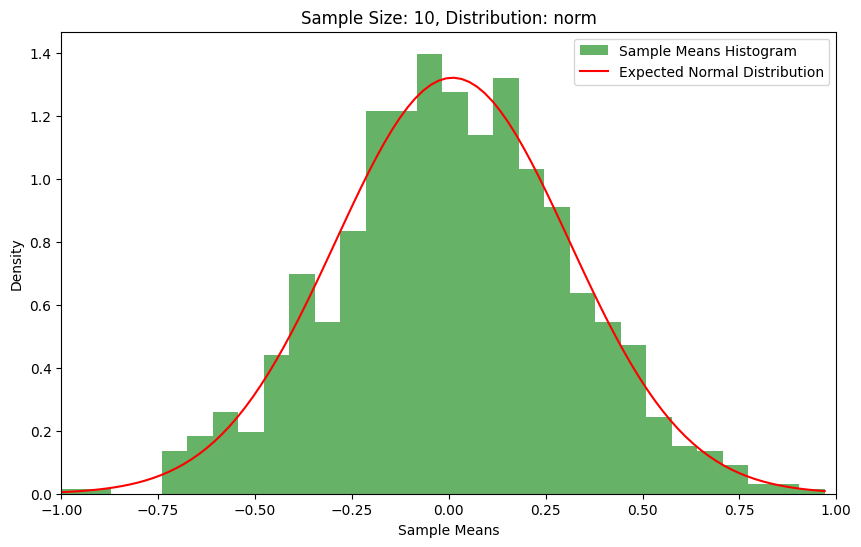

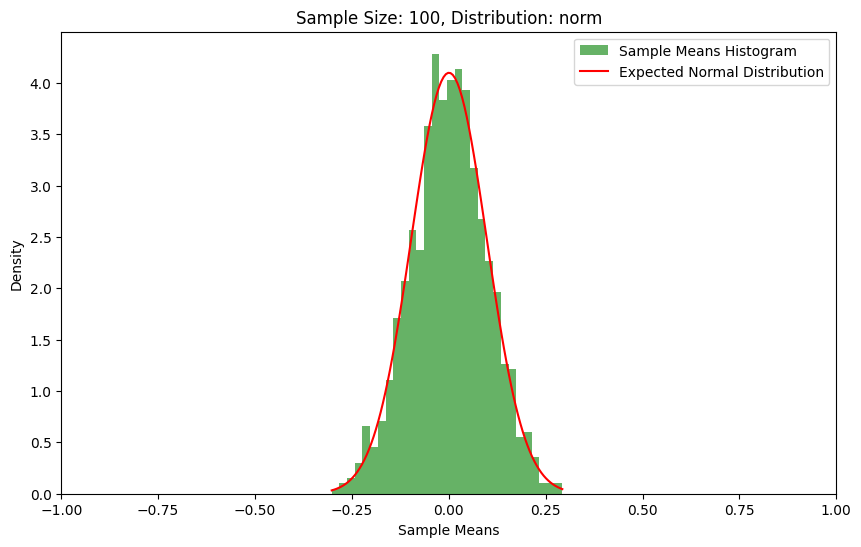

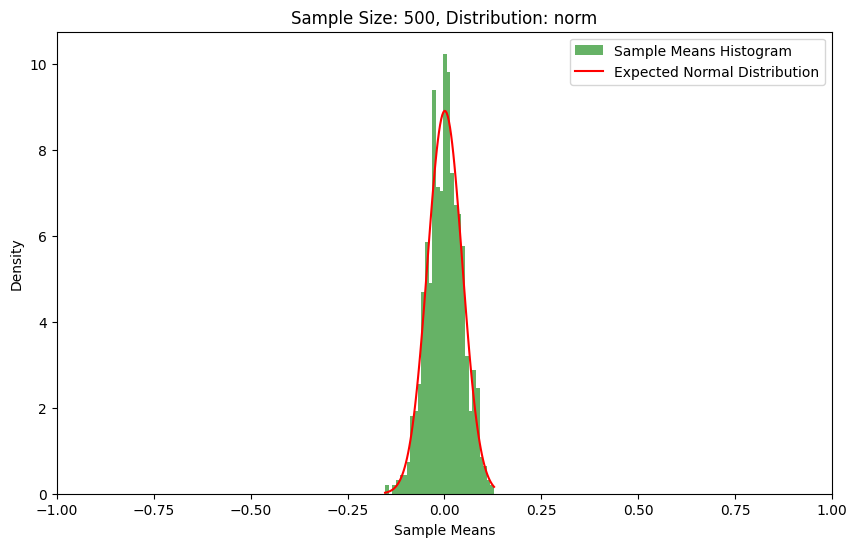

Analyzing expon distribution...


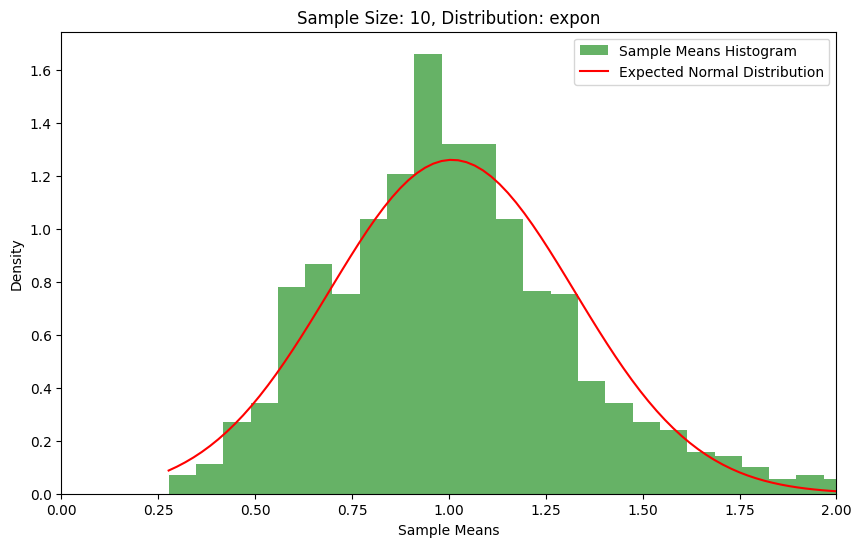

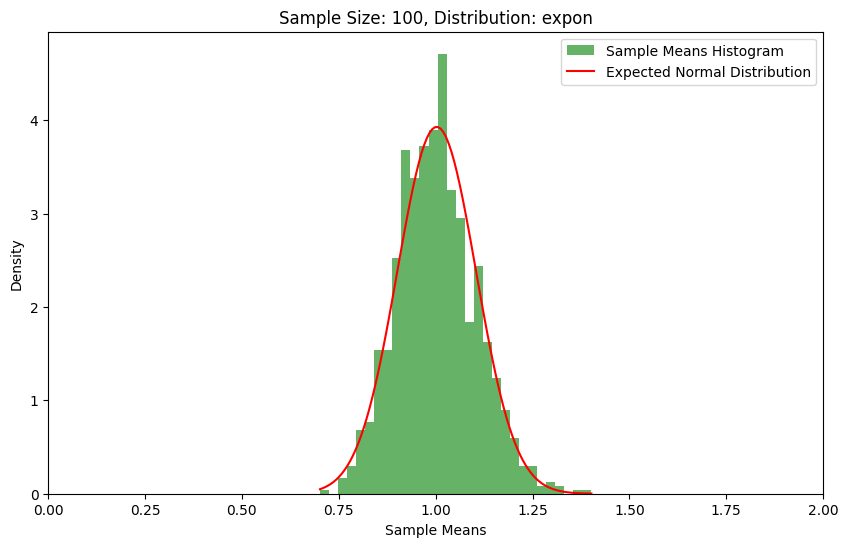

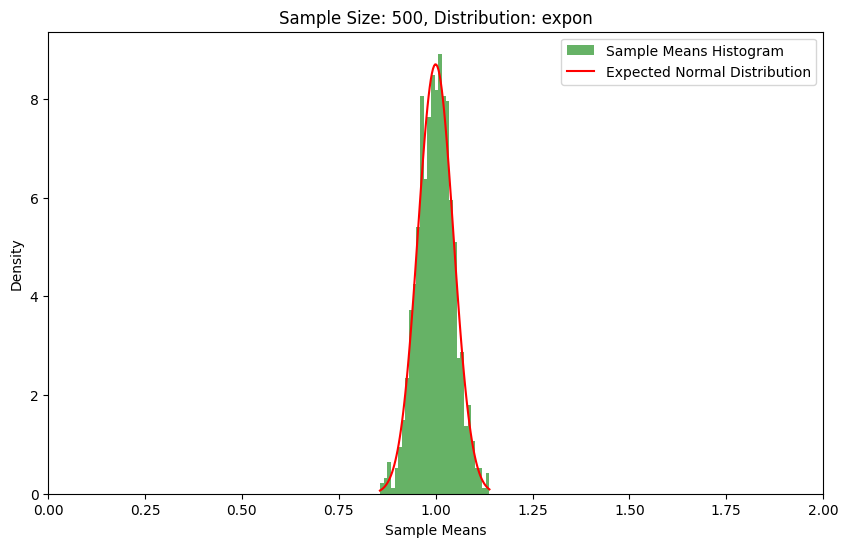

Analyzing uniform distribution...


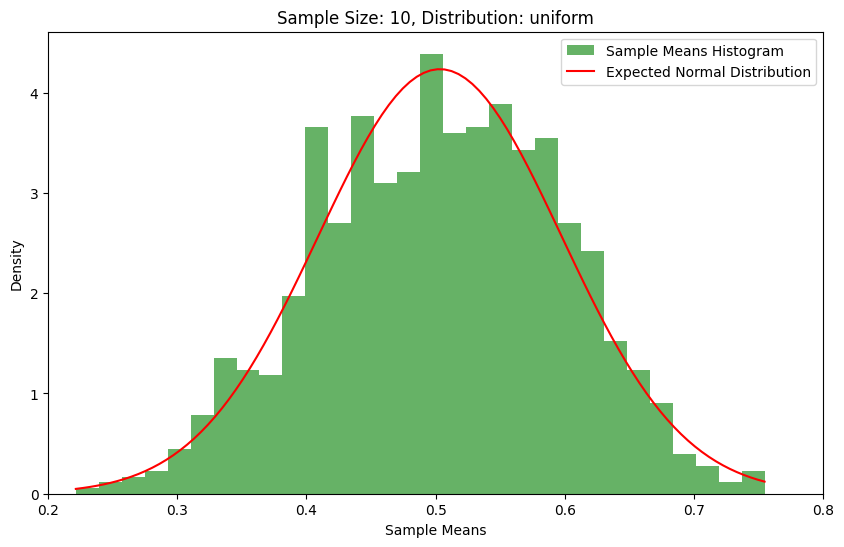

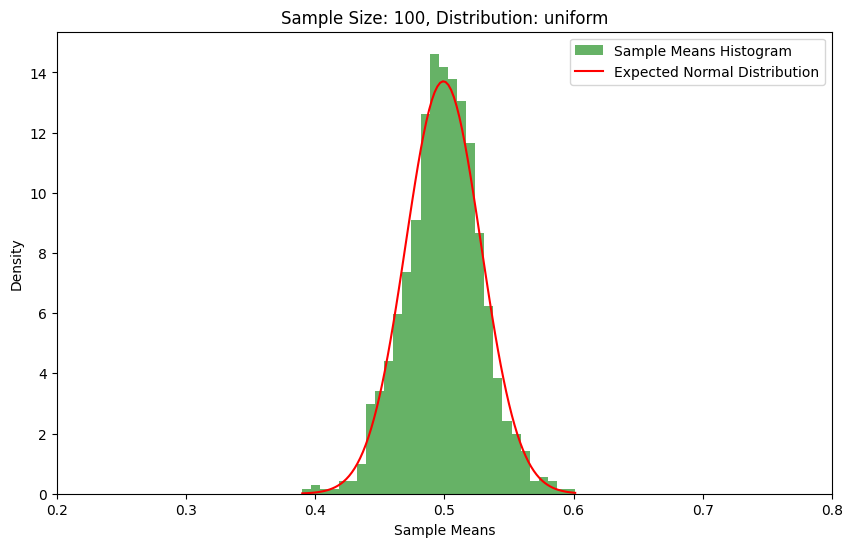

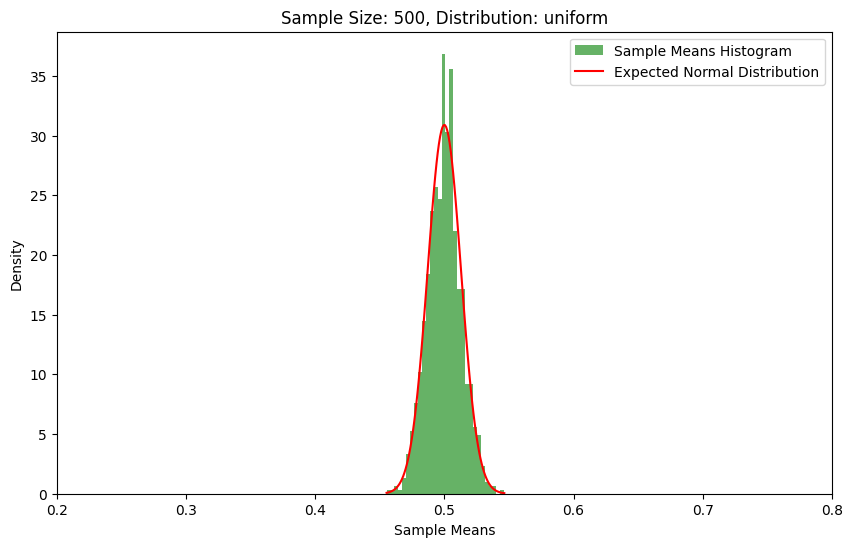

In [4]:
num_samples = 1000
sample_sizes = [10, 100, 500]

def generate_sample_means(distribution, sample_size):
    sample_means = []
    for _ in range(num_samples):
        sample = distribution.rvs(size=sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

def plot_sample_means(sample_means, sample_size, distribution, xlim_range):
    plt.figure(figsize=(10, 6))
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', label='Sample Means Histogram')
    
    mu = np.mean(sample_means)
    sigma = np.std(sample_means)
    
    x = np.linspace(min(sample_means), max(sample_means), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Expected Normal Distribution')
    
    plt.xlim(xlim_range)
    plt.title(f'Sample Size: {sample_size}, Distribution: {distribution.name}')
    plt.xlabel('Sample Means')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

distributions = [norm, expon, uniform]
xlim_ranges = [[-1, 1], [0, 2], [0.2, 0.8]]
for distribution, xlim_range in zip(distributions, xlim_ranges):
    print(f"Analyzing {distribution.name} distribution...")
    for sample_size in sample_sizes:
        sample_means = generate_sample_means(distribution, sample_size)
        plot_sample_means(sample_means, sample_size, distribution, xlim_range)


## 3. Hypothesis Testing

#Unfair Coin

In [5]:
import numpy as np
from scipy.stats import norm

p_heads_unfair = 0.55

# Number of coin flips for each sample size
sample_sizes = [30, 100, 1000]

num_simulations = 1000

def simulate_coin_flips(p_heads, num_flips):
    return np.random.choice(['H', 'T'], size=num_flips, p=[p_heads, 1-p_heads])

# Perform hypothesis testing for each sample size
for n in sample_sizes:
    print(f"\nSample Size: {n}")
    for i in range(num_simulations):
        flips = simulate_coin_flips(p_heads_unfair, n)
        num_heads = np.sum(flips == 'H')
        
        p_hat = num_heads / n

        z_score = (p_hat - 0.5) / np.sqrt(0.5 * 0.5 / n)
        # Calculate p-value
        p_value = 2 * (norm.sf(abs(z_score))) # I don't know if i have to use (1 - norm.cdf) or (norm.sf)??
        
        # Confidence interval
        margin_of_error = 1.96 * np.sqrt(p_hat * (1 - p_hat) / n)
        confidence_interval = (p_hat - margin_of_error, p_hat + margin_of_error)
        
        # Decision based on confidence interval
        if confidence_interval[0] <= 0.5 <= confidence_interval[1]:
            confidence_decision = "Accept H0 (fair)"
        else:
            confidence_decision = "Reject H0 (unfair)"
        
        # Decision based on p-value
        if p_value < 0.05:
            p_value_decision = "Reject H0 (unfair)"
        else:
            p_value_decision = "Accept H0 (fair)"
        
        print(f"Simulation {i+1}: Z-Score = {z_score:.4f}, P-Value = {p_value:.4f}, "
              f"Confidence Decision = {confidence_decision}, P-Value Decision = {p_value_decision}")



Sample Size: 30
Simulation 1: Z-Score = 0.0000, P-Value = 1.0000, Confidence Decision = Accept H0 (fair), P-Value Decision = Accept H0 (fair)
Simulation 2: Z-Score = 2.1909, P-Value = 0.0285, Confidence Decision = Reject H0 (unfair), P-Value Decision = Reject H0 (unfair)
Simulation 3: Z-Score = 1.0954, P-Value = 0.2733, Confidence Decision = Accept H0 (fair), P-Value Decision = Accept H0 (fair)
Simulation 4: Z-Score = 1.0954, P-Value = 0.2733, Confidence Decision = Accept H0 (fair), P-Value Decision = Accept H0 (fair)
Simulation 5: Z-Score = 0.3651, P-Value = 0.7150, Confidence Decision = Accept H0 (fair), P-Value Decision = Accept H0 (fair)
Simulation 6: Z-Score = -1.0954, P-Value = 0.2733, Confidence Decision = Accept H0 (fair), P-Value Decision = Accept H0 (fair)
Simulation 7: Z-Score = 0.3651, P-Value = 0.7150, Confidence Decision = Accept H0 (fair), P-Value Decision = Accept H0 (fair)
Simulation 8: Z-Score = 0.3651, P-Value = 0.7150, Confidence Decision = Accept H0 (fair), P-Valu

## Questions

### Applications of Monte Carlo Simulation:

1. **Finance and Risk Analysis**: Monte Carlo simulation is extensively used in finance for risk assessment and portfolio optimization. It can simulate thousands of possible scenarios to predict the probability of various financial outcomes, such as the potential returns and risks associated with different investment portfolios.

2. **Engineering and Design**: In engineering, Monte Carlo simulation can be used for reliability analysis, design optimization, and performance prediction of complex systems and structures. It helps engineers identify potential failure points, optimize designs, and make informed decisions based on probabilistic outcomes.

3. **Healthcare and Medicine**: Monte Carlo simulation is used in healthcare for clinical trials, drug development, and treatment planning. It can simulate the effects of different treatments and interventions on patient outcomes, helping researchers and clinicians make evidence-based decisions and predictions.

4. **Energy and Utilities**: In the energy sector, Monte Carlo simulation can be applied to evaluate the performance and reliability of power generation systems, optimize energy production, and assess the risks associated with energy investments and operations.

5. **Project Management**: Monte Carlo simulation can be used in project management to assess the likelihood of completing projects on time and within budget. It can simulate various project scenarios, identify critical tasks, and help project managers allocate resources more effectively.

6. **Environmental Modeling**: Monte Carlo simulation is employed in environmental science and engineering to simulate natural processes, assess environmental risks, and evaluate the impact of human activities on ecosystems. It can help researchers and policymakers make informed decisions about environmental management and conservation strategies.



### Effect of sample size in part 2:

- the sample size has a significant impact on the Central Limit Theorem. As the sample size increases, the distribution of sample means converges to a normal distribution, the variability decreases, and the accuracy of estimates improves. Understanding and considering the role of sample size is essential for applying the Central Limit Theorem effectively in statistical analyses and research.
